# Final  
## EMAT 22110 - Data in Emerging Media and Technology
### Author: Michael Schoeppner
### Date: 12/11/22
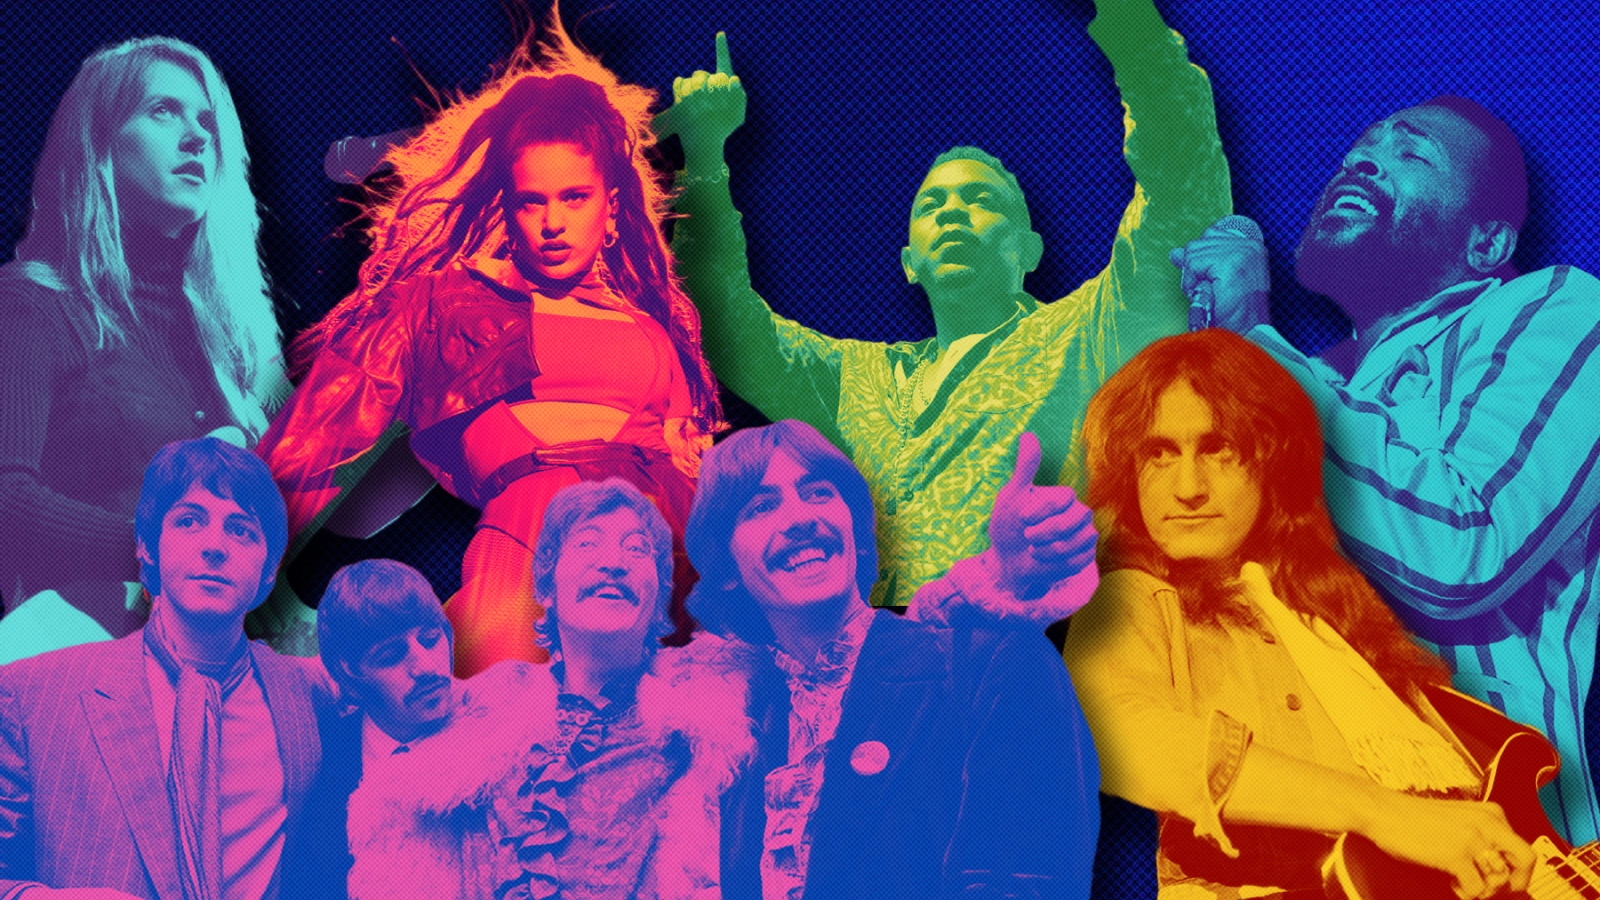

In order to examine the distinctions between two of my favorite periods of the year for my report's chosen topic, winter and Christmas, as well as autumn and Halloween, fall among the categories I will be covering. I'll start by examining the two publications I came across that stated that these were the most well-liked songs of those seasons. After collecting, I created a playlist with them in ascending order of popularity. I'll be able to collect information from the mentioned playlists proving that they are really among the most popular, as well as all the related information related to the audio features that go with them. My hypothesis is that the majority of these songs won't be in the proper order of popularity, proving that the article was inaccurate but also showing that winter and Christmas have the majority of the popular songs.

My initial theory started to hold true after I started compiling the data from both playlists. I noticed that the top 5 songs on the fall and Halloween playlist were not in the proper sequence. In actuality, "Highway to Hell," which had a popularity rating of 84, was more well-liked than "Thriller," which had a rating of 73. I'll have to check to see if my theory holds true for the winter and Christmas playlists, as it has for the fall and Halloween playlists. The Christmas and winter playlist seemed to be in order at first, but then I realized that numbers 4 and 5 were so close together that you might easily miss them. The Christmas Song (Merry Christmas To You), which is currently at number four, and "A Holly Jolly Christmas," which is currently at number five, both have popularity levels of 86 and 87, respectively. Even if it is just inaccurate by one number, the article is also incorrect as a result.

After confirming that both stories were inaccurate, I still had to determine which playlists contained the most well-liked music. I was able to determine that the Christmas and holiday playlist had several songs that were ranked on the high end of popularity while also having a few that were on the low end after combining both playlists into a single dataframe and comparing each of the audio attributes each playlist had to offer. Agreeing further, it was determined that the popularity rating in the article was inaccurate. The Halloween and fall playlists were all balanced in the middle, with a few songs that were extremely popular and a few that were really disliked. In the end, my hypothesis—that Christmas and winter holiday music were more popular than fall and Halloween holiday songs—was proven to be true.

In [247]:
import pandas as pd
import json
from matplotlib import pyplot as plt
from scipy import stats
import base64
import numpy as np
import requests

I'll need to get Spotify data for my report, but first I must obtain my Spotify authorization keys.

In [248]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 2A5E-5FC9

 Directory of C:\Users\shep4\EMAT-FALL22

12/15/2022  12:28 PM    <DIR>          .
11/01/2022  10:28 AM    <DIR>          ..
12/02/2022  12:44 PM               205 .cache
12/14/2022  06:21 PM    <DIR>          .ipynb_checkpoints
10/20/2022  11:07 AM            48,817 10-18_in-class_spotify.ipynb
10/23/2022  11:38 AM            39,806 10-18_in-class-Copy1.ipynb
10/27/2022  11:11 AM            37,345 10-27_in-class.ipynb
10/06/2022  10:19 AM             8,378 10-4_in-class.ipynb
10/06/2022  11:14 AM            27,295 10-6_in-class.ipynb
11/01/2022  11:06 AM            51,208 11-1_in-class.ipynb
11/10/2022  12:14 PM            13,121 11-10_in-class.ipynb
11/17/2022  12:05 PM            40,714 11-17_in-class.ipynb
11/22/2022  05:10 PM               589 11-3_in-class.ipynb
09/01/2022  10:24 AM               732 9-1_in-class.ipynb
12/11/2022  06:47 PM            10,181 audio_features.csv
11/01/2022  10:09 AM            77,889 

In [249]:
keys = pd.read_csv("Spotify-Keys_10-18-22.txt", header = 0, sep = ",")

In [250]:
appid = keys['Client_ID'][0]

In [251]:
appsecret = keys['Client_Secret'][0]

In [252]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))

In [253]:
headers = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

In [254]:
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [255]:
response = requests.post(access_token_url, headers = headers, data = payload)

In [256]:
session_token = response.json()['access_token']

In [257]:
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

I was able to estimate the number of the most well-known fall and Halloween-themed songs from a recent article I discovered, which was from this past October. I then used this article to make a playlist, ordering each song according to how popular it was at the time. I'll now collect the information from this playlist. Here is the link to website. Though I will be using the data from this to either prove that this is either correct in their evaluation or missed it by a couple.
https://www.timeout.com/music/best-halloween-songs

In [258]:
spooky_id = '6xuHrxObOuzSAgfuJpNyLm'

Playlist of the Fall/Halloween music I put together = 6xuHrxObOuzSAgfuJpNyLm

In [259]:
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}".format(spooky_id)

In [260]:
spooky_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)

In [261]:
spooky_tracks.status_code

200

In [262]:
spooky_dict = json.loads(spooky_tracks.text)

In [263]:
spooky_dict.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

In [264]:
spooky_dict['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [265]:
spooky_dict['tracks']['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [266]:
spooky_track_ids = [x['track'] for x in spooky_dict['tracks']['items']]

In [267]:
spooky = pd.DataFrame(spooky_track_ids)

Every song on the created playlist will now be available.

In [268]:
spooky.head()

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,357266,False,False,{'isrc': 'USSM19902989'},{'spotify': 'https://open.spotify.com/track/3S...,https://api.spotify.com/v1/tracks/3S2R0EVwBSAV...,3S2R0EVwBSAVMd5UMgKTL0,False,Thriller,72,https://p.scdn.co/mp3-preview/04e2e4889d434ec0...,True,4,track,spotify:track:3S2R0EVwBSAVMd5UMgKTL0
1,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,239133,False,False,{'isrc': 'USAR18400117'},{'spotify': 'https://open.spotify.com/track/56...,https://api.spotify.com/v1/tracks/569uHYIB0X32...,569uHYIB0X324FZOBEhvit,False,Ghostbusters,68,https://p.scdn.co/mp3-preview/9f4aa5928f0ebd49...,True,1,track,spotify:track:569uHYIB0X324FZOBEhvit
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,192040,False,False,{'isrc': 'GBBBA7360050'},{'spotify': 'https://open.spotify.com/track/0x...,https://api.spotify.com/v1/tracks/0xxZY5C9xxij...,0xxZY5C9xxij3D1HkzbnfC,False,Monster Mash,67,None,True,1,track,spotify:track:0xxZY5C9xxij3D1HkzbnfC
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,308120,False,False,{'isrc': 'USSM17600477'},{'spotify': 'https://open.spotify.com/track/5Q...,https://api.spotify.com/v1/tracks/5QTxFnGygVM4...,5QTxFnGygVM4jFQiBovmRo,False,(Don't Fear) The Reaper,76,https://p.scdn.co/mp3-preview/7506c69eeadd2ba6...,True,3,track,spotify:track:5QTxFnGygVM4jFQiBovmRo
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,208400,False,False,{'isrc': 'AUAP07900028'},{'spotify': 'https://open.spotify.com/track/2z...,https://api.spotify.com/v1/tracks/2zYzyRzz6pRm...,2zYzyRzz6pRmhPzyfMEC8s,False,Highway to Hell,84,https://p.scdn.co/mp3-preview/3589df13595d1ab1...,True,1,track,spotify:track:2zYzyRzz6pRmhPzyfMEC8s


Given the volume of information provided, I will need to remove some of it in order to get the information I need.

In [269]:
spooky_1 = spooky.drop(columns = ['available_markets', 'disc_number', 'episode', 'external_ids', 'is_local', 'preview_url', 'track', 'track_number', 'type','available_markets', 'external_urls', 'href', 'type', 'uri'])


In [270]:
spooky_1.head()

,album,artists,duration_ms,explicit,id,name,popularity
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,357266,False,3S2R0EVwBSAVMd5UMgKTL0,Thriller,72
1,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,239133,False,569uHYIB0X324FZOBEhvit,Ghostbusters,68
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,192040,False,0xxZY5C9xxij3D1HkzbnfC,Monster Mash,67
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,308120,False,5QTxFnGygVM4jFQiBovmRo,(Don't Fear) The Reaper,76
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,208400,False,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,84


There is still a sizable amount of data, but I will have to organize some of it to locate the data I seek.

In [271]:
pd.DataFrame(spooky_1['artists'][0])

,external_urls,href,id,name,type,uri
0,{'spotify': 'https://open.spotify.com/artist/3...,https://api.spotify.com/v1/artists/3fMbdgg4jU1...,3fMbdgg4jU18AjLCKBhRSm,Michael Jackson,artist,spotify:artist:3fMbdgg4jU18AjLCKBhRSm


In [272]:
spooky_1['artists'][0][0]['name']

'Michael Jackson'

In [273]:
artist = [x[0]['name'] for x in spooky['artists']]

In [274]:
artists_name =  pd.DataFrame(artist)

In [275]:
artists_name.head()

,0
0,Michael Jackson
1,Ray Parker Jr.
2,"Bobby ""Boris"" Pickett"
3,Blue Öyster Cult
4,AC/DC


In [276]:
spooky_1['artists_name'] = artists_name

In [277]:
spooky_1.drop(columns = ['artists']).head()

,album,duration_ms,explicit,id,name,popularity,artists_name
0,"{'album_type': 'album', 'artists': [{'external...",357266,False,3S2R0EVwBSAVMd5UMgKTL0,Thriller,72,Michael Jackson
1,"{'album_type': 'compilation', 'artists': [{'ex...",239133,False,569uHYIB0X324FZOBEhvit,Ghostbusters,68,Ray Parker Jr.
2,"{'album_type': 'album', 'artists': [{'external...",192040,False,0xxZY5C9xxij3D1HkzbnfC,Monster Mash,67,"Bobby ""Boris"" Pickett"
3,"{'album_type': 'album', 'artists': [{'external...",308120,False,5QTxFnGygVM4jFQiBovmRo,(Don't Fear) The Reaper,76,Blue Öyster Cult
4,"{'album_type': 'album', 'artists': [{'external...",208400,False,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,84,AC/DC


In [278]:
spooky_1['album_name'] = spooky_1['name']

In [279]:
Hal_pop = spooky_1.drop(columns = ['explicit', 'artists', 'album'])

In [280]:
Hal_pop.head()

,duration_ms,id,name,popularity,artists_name,album_name
0,357266,3S2R0EVwBSAVMd5UMgKTL0,Thriller,72,Michael Jackson,Thriller
1,239133,569uHYIB0X324FZOBEhvit,Ghostbusters,68,Ray Parker Jr.,Ghostbusters
2,192040,0xxZY5C9xxij3D1HkzbnfC,Monster Mash,67,"Bobby ""Boris"" Pickett",Monster Mash
3,308120,5QTxFnGygVM4jFQiBovmRo,(Don't Fear) The Reaper,76,Blue Öyster Cult,(Don't Fear) The Reaper
4,208400,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,84,AC/DC,Highway to Hell


Here is the final dataframe for the first playlist

In [281]:
Hal_pop_ids = Hal_pop['id']

In [282]:
Hal_pop_strings = ','.join(str(x) for x in Hal_pop_ids)
Hal_pop_strings

'3S2R0EVwBSAVMd5UMgKTL0,569uHYIB0X324FZOBEhvit,0xxZY5C9xxij3D1HkzbnfC,5QTxFnGygVM4jFQiBovmRo,2zYzyRzz6pRmhPzyfMEC8s,01YROQCnF1AQm7SCWJmD2o,6kotXaSQaGYxE62hVpdHWu,6hci8n9UowepjRmCc6CKTv,2aRjuScpka878tUWOsLYpQ,4YMQXzscifAREG0a7KNGhB,1h2xVEoJORqrg71HocgqXd,3sLhMSePzxSrmxluIqeoAZ,5qRJD1yaLJ5s0J3JpbgnwA,1i6N76fftMZhijOzFQ5ZtL,1Ud6moTC0KyXMq1Oxfien0,2E7W1X4maFFcjHrVrFA7Vs,2h47SG8bNphmicAll4H9RV,7EZC6E7UjZe63f1jRmkWxt,4WFeJTXNHIS2wURtwlAkhu,743DaI0d44SpwV2ArTPGmy'

Now I will collect the audio features for the Fall/Halloween playlist

In [283]:
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(Hal_pop_strings)

In [284]:
Hal_features = requests.get(track_features_endpoint, headers = session_header)

In [285]:
Hal_features.status_code

200

In [286]:
Hal_dict = json.loads(Hal_features.text)

In [287]:
Hal_dict.keys()

dict_keys(['audio_features'])

In [288]:
Spooky_af = Hal_dict['audio_features']

In [289]:
Spooky_df = pd.DataFrame(Spooky_af)

In [290]:
Spooky_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.773,0.859,11,-4.913,1,0.0747,0.0855,0.000187,0.914,0.813,118.459,audio_features,3S2R0EVwBSAVMd5UMgKTL0,spotify:track:3S2R0EVwBSAVMd5UMgKTL0,https://api.spotify.com/v1/tracks/3S2R0EVwBSAV...,https://api.spotify.com/v1/audio-analysis/3S2R...,357267,4
1,0.778,0.719,4,-9.698,1,0.0345,0.0123,0.026200,0.297,0.729,115.400,audio_features,569uHYIB0X324FZOBEhvit,spotify:track:569uHYIB0X324FZOBEhvit,https://api.spotify.com/v1/tracks/569uHYIB0X32...,https://api.spotify.com/v1/audio-analysis/569u...,239133,4
2,0.541,0.504,11,-14.191,0,0.4570,0.3750,0.000000,0.421,0.707,68.482,audio_features,0xxZY5C9xxij3D1HkzbnfC,spotify:track:0xxZY5C9xxij3D1HkzbnfC,https://api.spotify.com/v1/tracks/0xxZY5C9xxij...,https://api.spotify.com/v1/audio-analysis/0xxZ...,192040,4
3,0.333,0.927,9,-8.550,0,0.0733,0.0029,0.000208,0.297,0.385,141.466,audio_features,5QTxFnGygVM4jFQiBovmRo,spotify:track:5QTxFnGygVM4jFQiBovmRo,https://api.spotify.com/v1/tracks/5QTxFnGygVM4...,https://api.spotify.com/v1/audio-analysis/5QTx...,308120,4
4,0.574,0.913,6,-4.793,0,0.1330,0.0610,0.001580,0.156,0.423,115.728,audio_features,2zYzyRzz6pRmhPzyfMEC8s,spotify:track:2zYzyRzz6pRmhPzyfMEC8s,https://api.spotify.com/v1/tracks/2zYzyRzz6pRm...,https://api.spotify.com/v1/audio-analysis/2zYz...,208400,4


Now to blend both dataframes

In [291]:
Hal_pop['danceability'] = Spooky_df['danceability']
Hal_pop['energy'] = Spooky_df['energy']
Hal_pop['key'] = Spooky_df['key']
Hal_pop['loudness'] = Spooky_df['loudness']
Hal_pop['mode'] = Spooky_df['mode']
Hal_pop['speechiness'] = Spooky_df['speechiness']
Hal_pop['acousticness'] = Spooky_df['acousticness']
Hal_pop['instrumentalness'] = Spooky_df['instrumentalness']
Hal_pop['liveness'] = Spooky_df['liveness']
Hal_pop['valence'] = Spooky_df['valence']
Hal_pop['tempo'] = Spooky_df['tempo']
Hal_pop['id'] = Spooky_df['id']
Hal_pop['duration_ms'] = Spooky_df['duration_ms']
Hal_pop['time_signature'] = Spooky_df['time_signature']

In [292]:
Hal_pop.head()

,duration_ms,id,name,popularity,artists_name,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,357267,3S2R0EVwBSAVMd5UMgKTL0,Thriller,72,Michael Jackson,Thriller,0.773,0.859,11,-4.913,1,0.0747,0.0855,0.000187,0.914,0.813,118.459,4
1,239133,569uHYIB0X324FZOBEhvit,Ghostbusters,68,Ray Parker Jr.,Ghostbusters,0.778,0.719,4,-9.698,1,0.0345,0.0123,0.026200,0.297,0.729,115.400,4
2,192040,0xxZY5C9xxij3D1HkzbnfC,Monster Mash,67,"Bobby ""Boris"" Pickett",Monster Mash,0.541,0.504,11,-14.191,0,0.4570,0.3750,0.000000,0.421,0.707,68.482,4
3,308120,5QTxFnGygVM4jFQiBovmRo,(Don't Fear) The Reaper,76,Blue Öyster Cult,(Don't Fear) The Reaper,0.333,0.927,9,-8.550,0,0.0733,0.0029,0.000208,0.297,0.385,141.466,4
4,208400,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,84,AC/DC,Highway to Hell,0.574,0.913,6,-4.793,0,0.1330,0.0610,0.001580,0.156,0.423,115.728,4


In [293]:
winter_id = '74CP5rG6MyY0RRnCgbh4DN'
album_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}".format(winter_id)
winter_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(winter_tracks.status_code)
winter_dict = json.loads(winter_tracks.text)
winter_dict.keys()
winter_dict['tracks'].keys()
winter_dict['tracks']['items'][0].keys()
winter_track_ids = [x['track'] for x in winter_dict['tracks']['items']]
winter = pd.DataFrame(winter_track_ids)
winter.head()

200


,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,241106,False,False,{'isrc': 'USSM19400325'},{'spotify': 'https://open.spotify.com/track/0b...,https://api.spotify.com/v1/tracks/0bYg9bo50gSs...,0bYg9bo50gSsH3LtXe2SQn,False,All I Want for Christmas Is You,97,https://p.scdn.co/mp3-preview/0d3f660241b04b1e...,True,2,track,spotify:track:0bYg9bo50gSsH3LtXe2SQn
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,126266,False,False,{'isrc': 'USMC15848998'},{'spotify': 'https://open.spotify.com/track/2E...,https://api.spotify.com/v1/tracks/2EjXfH91m7f8...,2EjXfH91m7f8HiJN1yQg97,False,Rockin' Around The Christmas Tree,95,None,True,1,track,spotify:track:2EjXfH91m7f8HiJN1yQg97
2,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,130973,False,False,{'isrc': 'USMC15746480'},{'spotify': 'https://open.spotify.com/track/7v...,https://api.spotify.com/v1/tracks/7vQbuQcyTflf...,7vQbuQcyTflfCIOu3Uzzya,False,Jingle Bell Rock,93,None,True,1,track,spotify:track:7vQbuQcyTflfCIOu3Uzzya
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,192160,False,False,{'isrc': 'USCA29900551'},{'spotify': 'https://open.spotify.com/track/4P...,https://api.spotify.com/v1/tracks/4PS1e8f2LvuT...,4PS1e8f2LvuTFgUs1Cn3ON,False,The Christmas Song (Merry Christmas To You),87,None,True,1,track,spotify:track:4PS1e8f2LvuTFgUs1Cn3ON
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,135533,False,False,{'isrc': 'USMC16414508'},{'spotify': 'https://open.spotify.com/track/77...,https://api.spotify.com/v1/tracks/77khP2fIVhSW...,77khP2fIVhSW23NwxrRluh,False,A Holly Jolly Christmas,89,None,True,1,track,spotify:track:77khP2fIVhSW23NwxrRluh


I put everything together so it was easier to read but after the next code cell will be the completed dataframe for the Winter playlists that I created. Here is also the link to the article I found that stated that these were the most popular in order and from collecting this data I hope to either prove that they were correct or off by a bit. 
https://www.billboard.com/charts/greatest-of-all-time-holiday-100-songs/

In [294]:
winter1 = winter.drop(columns = ['available_markets', 'disc_number', 'episode', 'external_ids', 'is_local', 'preview_url', 'track', 'track_number', 'type','available_markets', 'external_urls', 'href', 'type', 'uri'])
pd.DataFrame(winter1['artists'][0])
winter1['artists'][0][0]['name']
artist1 = [x[0]['name'] for x in spooky['artists']]
artists1_name =  pd.DataFrame(artist1)
artists1_name.head()
winter1['artists_name'] = artists1_name
winter1.drop(columns = ['artists']).head()
winter1['album_name'] = winter1['name']

In [295]:
winter1.head()

,album,artists,duration_ms,explicit,id,name,popularity,artists_name,album_name
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,241106,False,0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,97,Michael Jackson,All I Want for Christmas Is You
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,126266,False,2EjXfH91m7f8HiJN1yQg97,Rockin' Around The Christmas Tree,95,Ray Parker Jr.,Rockin' Around The Christmas Tree
2,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,130973,False,7vQbuQcyTflfCIOu3Uzzya,Jingle Bell Rock,93,"Bobby ""Boris"" Pickett",Jingle Bell Rock
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,192160,False,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),87,Blue Öyster Cult,The Christmas Song (Merry Christmas To You)
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,135533,False,77khP2fIVhSW23NwxrRluh,A Holly Jolly Christmas,89,AC/DC,A Holly Jolly Christmas


In [296]:
Win_pop = winter1.drop(columns = ['explicit', 'artists', 'album', 'artists_name'])
Win_pop.head()
Win_pop_ids = Win_pop['id']
Win_pop_strings = ','.join(str(x) for x in Win_pop_ids)
Win_pop_strings

'0bYg9bo50gSsH3LtXe2SQn,2EjXfH91m7f8HiJN1yQg97,7vQbuQcyTflfCIOu3Uzzya,4PS1e8f2LvuTFgUs1Cn3ON,77khP2fIVhSW23NwxrRluh,0oPdaY4dXtc3ZsaG17V972,5hslUAKq9I9CG2bAulFkHN,2FRnf9qhLbvw8fu4IBXx78,4so0Wek9Ig1p6CRCHuINwW,2uFaJJtFpPDc5Pa95XzTvg,3sBnSBnzpEYKpJYGsAIbup,1dtIaSlyrLI04sqYa8nLyN,4z8sz6E4YyFuEkv5o7IJni,5a1iz510sv2W9Dt1MvFd5R,5ASM6Qjiav2xPe7gRkQMsQ,4hAkwE0k1MlzDoOIf9J8ty,7xapw9Oy21WpfEcib2ErSA,3QiAAp20rPC3dcAtKtMaqQ,0O4vuJynWVVdyvoHvZtnk3,5aj4UEKeW7T3eI4ETaN7Me,0lizgQ7Qw35od7CYaoMBZb,6ZgigeSB0XUMqc0jjzaq6d,3sDdyBHQ60Cs1opmIyRvhp,3YZE5qDV7u1ZD1gZc47ZeR,25leEEaz1gIpp7o21Fqyjo,0HZk0QsXPhMNAWNDR3rYE8,3QIoEi8Enr9uHffwInGIsC,3bMfUUpzUzqWp9II00yRhE,4p401d3dipTVawmjZ2AXsx,0247StOpd3AkeBQzANX4Zf,1foCxQtxBweJtZmdxhEHVO,1uh1iaMqBdx4XyrXhssKGD,33EcmYsTQVIGRGnGPOfTwu,1msuiw6pnXYfxZ7Edyit9U,6s2wpWPFPAgKg2LXxi1Oee,7BvCDrlYwJ5D9RUqvvs3BT,5xlS0QkVrSH7ssEbBgBzbM,2pXpURmn6zC5ZYDMms6fwa,4HEOgBHRCExyYVeTyrXsnL,2pnPe4pJtq7689i5ydzvJJ,6tjituizSxwSmBB5vtgHZE,0hvN2v6fAcB6xWyW7UaooA,2QpN1ZVw8eJO5f7WcvUA1k,47ohYW8e7d

In [297]:
winter_track_strings = ','.join(str(x) for x in winter_track_ids)

In [ ]:
print(winter_track_strings)

After finishing the collected dataframe for the most popular Winter holiday songs I will collect the audio features and merge them together.

In [299]:
Win_track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(Hal_pop_strings)

In [300]:
Win_features = requests.get(Win_track_features_endpoint, headers = session_header)

In [301]:
Win_features.status_code

200

In [302]:
Win_dict = json.loads(Win_features.text)
Win_dict.keys()
Winter_af = Win_dict['audio_features']
Winter_df = pd.DataFrame(Winter_af)
Winter_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.773,0.859,11,-4.913,1,0.0747,0.0855,0.000187,0.914,0.813,118.459,audio_features,3S2R0EVwBSAVMd5UMgKTL0,spotify:track:3S2R0EVwBSAVMd5UMgKTL0,https://api.spotify.com/v1/tracks/3S2R0EVwBSAV...,https://api.spotify.com/v1/audio-analysis/3S2R...,357267,4
1,0.778,0.719,4,-9.698,1,0.0345,0.0123,0.026200,0.297,0.729,115.400,audio_features,569uHYIB0X324FZOBEhvit,spotify:track:569uHYIB0X324FZOBEhvit,https://api.spotify.com/v1/tracks/569uHYIB0X32...,https://api.spotify.com/v1/audio-analysis/569u...,239133,4
2,0.541,0.504,11,-14.191,0,0.4570,0.3750,0.000000,0.421,0.707,68.482,audio_features,0xxZY5C9xxij3D1HkzbnfC,spotify:track:0xxZY5C9xxij3D1HkzbnfC,https://api.spotify.com/v1/tracks/0xxZY5C9xxij...,https://api.spotify.com/v1/audio-analysis/0xxZ...,192040,4
3,0.333,0.927,9,-8.550,0,0.0733,0.0029,0.000208,0.297,0.385,141.466,audio_features,5QTxFnGygVM4jFQiBovmRo,spotify:track:5QTxFnGygVM4jFQiBovmRo,https://api.spotify.com/v1/tracks/5QTxFnGygVM4...,https://api.spotify.com/v1/audio-analysis/5QTx...,308120,4
4,0.574,0.913,6,-4.793,0,0.1330,0.0610,0.001580,0.156,0.423,115.728,audio_features,2zYzyRzz6pRmhPzyfMEC8s,spotify:track:2zYzyRzz6pRmhPzyfMEC8s,https://api.spotify.com/v1/tracks/2zYzyRzz6pRm...,https://api.spotify.com/v1/audio-analysis/2zYz...,208400,4


In [303]:
Win_pop['danceability'] = Winter_df['danceability']
Win_pop['energy'] = Winter_df['energy']
Win_pop['key'] = Winter_df['key']
Win_pop['loudness'] = Winter_df['loudness']
Win_pop['mode'] = Winter_df['mode']
Win_pop['speechiness'] = Winter_df['speechiness']
Win_pop['acousticness'] = Winter_df['acousticness']
Win_pop['instrumentalness'] = Winter_df['instrumentalness']
Win_pop['liveness'] = Winter_df['liveness']
Win_pop['valence'] = Winter_df['valence']
Win_pop['tempo'] = Winter_df['tempo']
Win_pop['id'] = Winter_df['id']
Win_pop['duration_ms'] = Winter_df['duration_ms']
Win_pop['time_signature'] = Winter_df['time_signature']

In [304]:
Win_pop.head()

,duration_ms,id,name,popularity,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,357267.0,3S2R0EVwBSAVMd5UMgKTL0,All I Want for Christmas Is You,97,All I Want for Christmas Is You,0.773,0.859,11.0,-4.913,1.0,0.0747,0.0855,0.000187,0.914,0.813,118.459,4.0
1,239133.0,569uHYIB0X324FZOBEhvit,Rockin' Around The Christmas Tree,95,Rockin' Around The Christmas Tree,0.778,0.719,4.0,-9.698,1.0,0.0345,0.0123,0.026200,0.297,0.729,115.400,4.0
2,192040.0,0xxZY5C9xxij3D1HkzbnfC,Jingle Bell Rock,93,Jingle Bell Rock,0.541,0.504,11.0,-14.191,0.0,0.4570,0.3750,0.000000,0.421,0.707,68.482,4.0
3,308120.0,5QTxFnGygVM4jFQiBovmRo,The Christmas Song (Merry Christmas To You),87,The Christmas Song (Merry Christmas To You),0.333,0.927,9.0,-8.550,0.0,0.0733,0.0029,0.000208,0.297,0.385,141.466,4.0
4,208400.0,2zYzyRzz6pRmhPzyfMEC8s,A Holly Jolly Christmas,89,A Holly Jolly Christmas,0.574,0.913,6.0,-4.793,0.0,0.1330,0.0610,0.001580,0.156,0.423,115.728,4.0


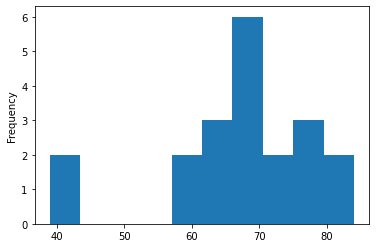

In [305]:
Halloween1 = Hal_pop['popularity'].plot.hist()
plt.show()

Here is the histogram of the Fall/Hallloween playlist popularity.

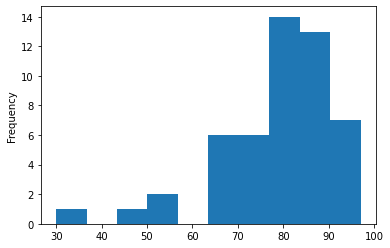

In [306]:
Winter1 = Win_pop['popularity'].plot.hist()
plt.show()

Starting here, the analysis of Spotify playlists will be applied. 

Here is the histogram of the Winter Holiday Playlist popularity.

In [307]:
audio_features = pd.concat([Win_pop, Hal_pop])

audio_features.to_csv('audio_features.csv')

In [308]:
af1 = pd.read_csv('audio_features.csv', sep = ',')

In [309]:
af1.head()

,Unnamed: 0,duration_ms,id,name,popularity,artists_name,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,357267.0,3S2R0EVwBSAVMd5UMgKTL0,All I Want for Christmas Is You,95,Michael Jackson,All I Want for Christmas Is You,0.773,0.859,11.0,-4.913,1.0,0.0747,0.0855,0.000187,0.914,0.813,118.459,4.0
1,1,239133.0,569uHYIB0X324FZOBEhvit,Rockin' Around The Christmas Tree,93,Ray Parker Jr.,Rockin' Around The Christmas Tree,0.778,0.719,4.0,-9.698,1.0,0.0345,0.0123,0.026200,0.297,0.729,115.400,4.0
2,2,192040.0,0xxZY5C9xxij3D1HkzbnfC,Jingle Bell Rock,92,"Bobby ""Boris"" Pickett",Jingle Bell Rock,0.541,0.504,11.0,-14.191,0.0,0.4570,0.3750,0.000000,0.421,0.707,68.482,4.0
3,3,308120.0,5QTxFnGygVM4jFQiBovmRo,The Christmas Song (Merry Christmas To You),86,Blue Öyster Cult,The Christmas Song (Merry Christmas To You),0.333,0.927,9.0,-8.550,0.0,0.0733,0.0029,0.000208,0.297,0.385,141.466,4.0
4,4,208400.0,2zYzyRzz6pRmhPzyfMEC8s,A Holly Jolly Christmas,87,AC/DC,A Holly Jolly Christmas,0.574,0.913,6.0,-4.793,0.0,0.1330,0.0610,0.001580,0.156,0.423,115.728,4.0


In [310]:
af = af1.drop(columns = ['artists_name'])

In [311]:
af.keys()

Index(['Unnamed: 0', 'duration_ms', 'id', 'name', 'popularity', 'album_name',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

Here is the combined data frame of both playlists so I may use this data in graphs to compare to each other.

In [312]:
Hal_sort = Hal_pop.sort_values('popularity', ascending = False).head(10)

In [313]:
Hal_sort.head()

,duration_ms,id,name,popularity,artists_name,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
4,208400,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,84,AC/DC,Highway to Hell,0.574,0.913,6,-4.793,0,0.1330,0.0610,0.001580,0.1560,0.423,115.728,4
17,306440,7EZC6E7UjZe63f1jRmkWxt,Zombie,82,The Cranberries,Zombie,0.309,0.649,7,-8.994,1,0.0350,0.0158,0.005910,0.3670,0.312,166.915,4
13,261413,1i6N76fftMZhijOzFQ5ZtL,Psycho Killer - 2005 Remaster,78,Talking Heads,Psycho Killer - 2005 Remaster,0.721,0.521,2,-8.123,1,0.0613,0.0708,0.005450,0.1270,0.942,123.118,4
3,308120,5QTxFnGygVM4jFQiBovmRo,(Don't Fear) The Reaper,76,Blue Öyster Cult,(Don't Fear) The Reaper,0.333,0.927,9,-8.550,0,0.0733,0.0029,0.000208,0.2970,0.385,141.466,4
10,245493,1h2xVEoJORqrg71HocgqXd,Superstition - Single Version,75,Stevie Wonder,Superstition - Single Version,0.633,0.634,8,-12.115,1,0.0725,0.0380,0.006400,0.0385,0.872,100.499,4


We can conclude from this that the article's choices for most popular were incorrect. Being that "Highway to Hell" is the most popular and "Thriller" is not even in the top 5 as originally stated. 

In [314]:
Win_sort = Win_pop.sort_values('popularity', ascending = False).head(10)

In [315]:
Win_sort.head()

,duration_ms,id,name,popularity,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,357267.0,3S2R0EVwBSAVMd5UMgKTL0,All I Want for Christmas Is You,97,All I Want for Christmas Is You,0.773,0.859,11.0,-4.913,1.0,0.0747,0.0855,0.000187,0.9140,0.813,118.459,4.0
1,239133.0,569uHYIB0X324FZOBEhvit,Rockin' Around The Christmas Tree,95,Rockin' Around The Christmas Tree,0.778,0.719,4.0,-9.698,1.0,0.0345,0.0123,0.026200,0.2970,0.729,115.400,4.0
7,238773.0,6hci8n9UowepjRmCc6CKTv,Last Christmas,94,Last Christmas,0.773,0.505,1.0,-10.357,0.0,0.0329,0.1030,0.000138,0.0729,0.891,124.131,4.0
2,192040.0,0xxZY5C9xxij3D1HkzbnfC,Jingle Bell Rock,93,Jingle Bell Rock,0.541,0.504,11.0,-14.191,0.0,0.4570,0.3750,0.000000,0.4210,0.707,68.482,4.0
20,NaN,NaN,Santa Tell Me,93,Santa Tell Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here are the winter playlists, and you can tell that they were correct in "All I Want for Christmas" being the most popular among the winter holiday songs, but you can see they were wrong about the last remaining member of the top 5 being number 20, as they stated "Santa Tell Me" being the number 5 spot.

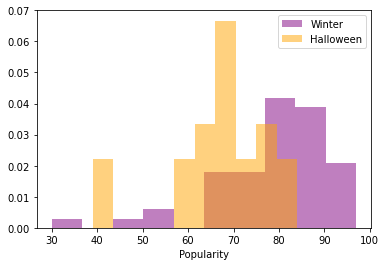

In [316]:
fig1, ax1 = plt.subplots()
Wp = Win_pop['popularity']
Hp = Hal_pop['popularity']
ax1.hist(Wp, alpha = 0.5, color = 'purple', label = 'Winter', density = True)
ax1.hist(Hp, alpha = 0.5, color = 'orange', label = 'Halloween', density = True)
ax1.set_xlabel('Popularity')
ax1.legend()
plt.show()

When glancing at the two different playlists, you can tell an immediate difference. The winter holiday playlist contains a significantly greater number of songs that were more popular than the fall seasonal playlist. Though most of the fall seasonal songs seemed to have a similar popularity, the winter holiday playlist seemed to have a small difference in popularity below the 60 mark. Though we can see that the seasonal fall playlist has more songs with similar popularity than the seasonal winter playlist, there are a few that are not grouped with the other songs.

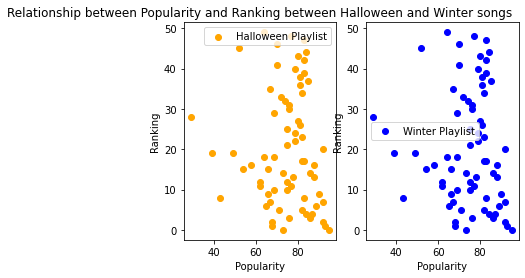

In [317]:
fig2, ax2 = plt.subplots(1, 2)
W_df = af 
H_df = af 
ax2[0].scatter(H_df['popularity'], H_df['Unnamed: 0'], label = 'Halloween Playlist', color = 'orange')
ax2[1].scatter(W_df['popularity'], W_df['Unnamed: 0'], label = 'Winter Playlist', color = 'blue')
ax2[0].set_xlabel('Popularity')
ax2[0].set_ylabel('Ranking')
ax2[1].set_xlabel('Popularity')
ax2[1].set_ylabel('Ranking')
ax2[0].set_title('Relationship between Popularity and Ranking between Halloween and Winter songs')
ax2[0].legend()
ax2[1].legend()
plt.show()

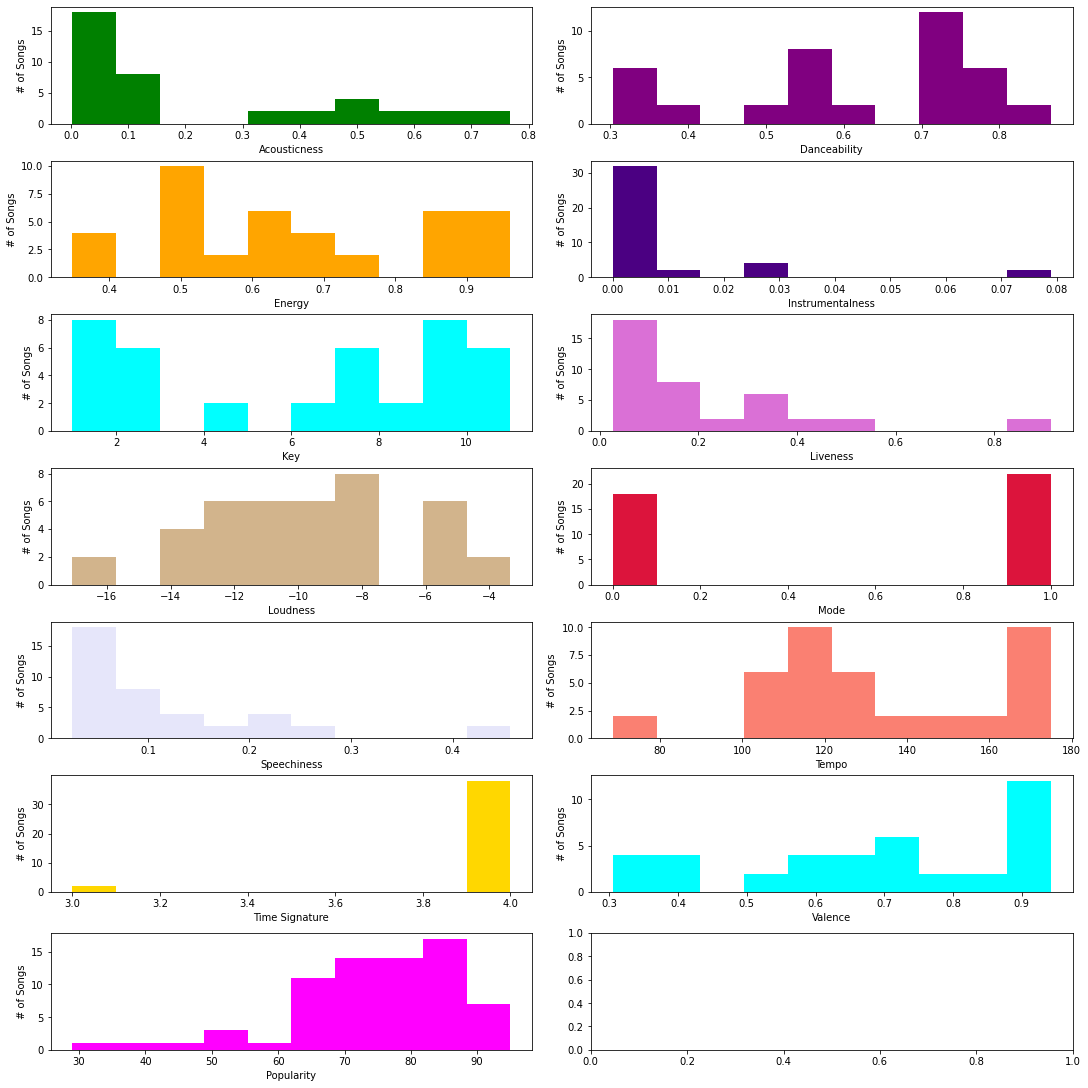

In [318]:
fig1, ax1 = plt.subplots(7, 2, layout = 'constrained') # (rows, columns)
fig1.set_figwidth(15) #change width size of the table
fig1.set_figheight(15) #change height size of the table
ax1[0, 0].hist(af['acousticness'], color = 'green')
ax1[0, 0].set_ylabel('# of Songs')
ax1[0, 0].set_xlabel('Acousticness')
ax1[0, 1].hist(af['danceability'], color = 'purple')
ax1[0, 1].set_ylabel('# of Songs')
ax1[0, 1].set_xlabel('Danceability')
ax1[1, 0].hist(af['energy'], color = 'orange')
ax1[1, 0].set_ylabel('# of Songs')
ax1[1, 0].set_xlabel('Energy')
ax1[1, 1].hist(af['instrumentalness'], color = 'indigo')
ax1[1, 1].set_ylabel('# of Songs')
ax1[1, 1].set_xlabel('Instrumentalness')
ax1[2, 0].hist(af['key'], color = 'aqua')
ax1[2, 0].set_ylabel('# of Songs')
ax1[2, 0].set_xlabel('Key')
ax1[2, 1].hist(af['liveness'], color = 'orchid')
ax1[2, 1].set_ylabel('# of Songs')
ax1[2, 1].set_xlabel('Liveness')
ax1[3, 0].hist(af['loudness'], color = 'tan')
ax1[3, 0].set_ylabel('# of Songs')
ax1[3, 0].set_xlabel('Loudness')
ax1[3, 1].hist(af['mode'], color = 'crimson')
ax1[3, 1].set_ylabel('# of Songs')
ax1[3, 1].set_xlabel('Mode')
ax1[4, 0].hist(af['speechiness'], color = 'lavender')
ax1[4, 0].set_ylabel('# of Songs')
ax1[4, 0].set_xlabel('Speechiness')
ax1[4, 1].hist(af['tempo'], color = 'salmon')
ax1[4, 1].set_ylabel('# of Songs')
ax1[4, 1].set_xlabel('Tempo')
ax1[5, 0].hist(af['time_signature'], color = 'gold')
ax1[5, 0].set_ylabel('# of Songs')
ax1[5, 0].set_xlabel('Time Signature')
ax1[5, 1].hist(af['valence'], color = 'cyan')
ax1[5, 1].set_ylabel('# of Songs')
ax1[5, 1].set_xlabel('Valence')
ax1[6, 0].hist(af['popularity'], color = 'fuchsia')
ax1[6, 0].set_ylabel('# of Songs')
ax1[6, 0].set_xlabel('Popularity')
plt.show()

I used histograms to compare both the fall seasonal and holiday playlists, categorized by audio features.

- Many songs were not very high on the acoustic side, but a small number were higher on the acoustic side.
- Many of the songs have a more upbeat, danceable feel.
- There were few to no instrumental songs.
- A great many of the songs were in key.
- The majority of the songs were recorded in studios as opposed to being performed live, as can be seen by reading the histogram.
- There were a great many songs that were very loud.
- It was almost evenly balanced between major and minor within the mode histogram.
- Many of the songs are quite vocally lacking.
- Every song was less than 180 beats per minute, with 10 that were above 160.
- With the possible exception of two songs, almost every song had a time signature of four beats per bar. Two songs had three beats per bar.
- The bulk of the remaining songs were balanced; however, the top 12 songs had the greatest valence rankings.
- There were a great many popular songs, which is why I created these playlists, though there were also a small number that weren't, which shows me that the articles I find claiming that these were the top popular songs could be wrong.

In [319]:
Seasonal_songs = af.head(20)

Only the top 10 songs from the merged playlists will be compiled here.

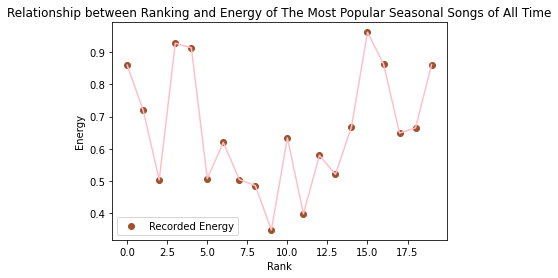

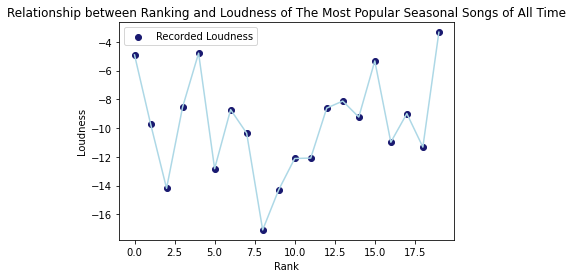

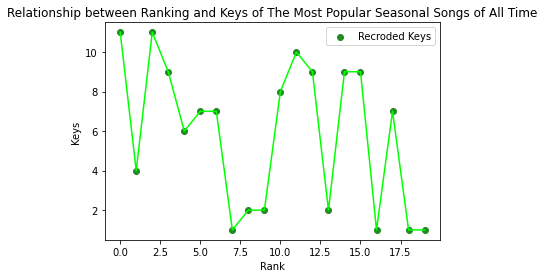

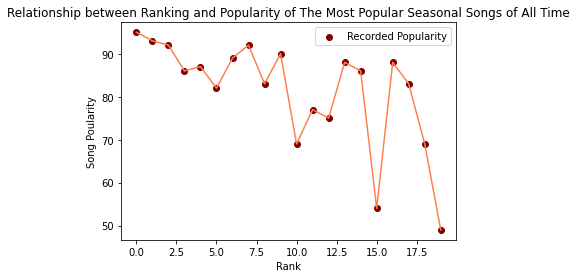

In [320]:
fig1, ax1 = plt.subplots()
ax1.scatter(Seasonal_songs['Unnamed: 0'], Seasonal_songs['energy'], label = 'Recorded Energy', color = 'sienna')
ax1.set_xlabel('Rank')
ax1.set_ylabel('Energy')
ax1.set_title('Relationship between Ranking and Energy of The Most Popular Seasonal Songs of All Time')
ax1.legend()
plt.plot(Seasonal_songs['Unnamed: 0'], Seasonal_songs['energy'],  color = 'pink')
plt.show()

fig2, ax2 = plt.subplots()
ax2.scatter(Seasonal_songs['Unnamed: 0'], Seasonal_songs['loudness'], label = 'Recorded Loudness', color = 'midnightblue')
ax2.set_xlabel('Rank')
ax2.set_ylabel('Loudness')
ax2.set_title('Relationship between Ranking and Loudness of The Most Popular Seasonal Songs of All Time')
ax2.legend()
plt.plot(Seasonal_songs['Unnamed: 0'], Seasonal_songs['loudness'],  color = 'lightblue')
plt.show()

fig3, ax3 = plt.subplots()
ax3.scatter(Seasonal_songs['Unnamed: 0'], Seasonal_songs['key'], label = 'Recroded Keys', color = 'forestgreen')
ax3.set_xlabel('Rank')
ax3.set_ylabel('Keys')
ax3.set_title('Relationship between Ranking and Keys of The Most Popular Seasonal Songs of All Time')
ax3.legend()
plt.plot(Seasonal_songs['Unnamed: 0'], Seasonal_songs['key'],  color = 'lime')
plt.show()

fig3, ax3 = plt.subplots()
ax3.scatter(Seasonal_songs['Unnamed: 0'], Seasonal_songs['popularity'], label = 'Recorded Popularity', color = 'maroon')
ax3.set_xlabel('Rank')
ax3.set_ylabel('Song Poularity')
ax3.set_title('Relationship between Ranking and Popularity of The Most Popular Seasonal Songs of All Time')
ax3.legend()
plt.plot(Seasonal_songs['Unnamed: 0'], Seasonal_songs['popularity'],  color = 'coral')
plt.show()

In this case, I've selected three distinct audio features in addition to the popularity category because they had the most diverse differences in the graph above. The ranking and popularity of each song are determined by a unique audio feature; however, not all songs are optimized the same and rely on other audio attributes to achieve a greater degree of popularity.

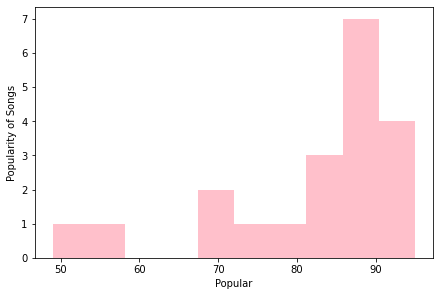

In [321]:
fig2, ax2 = plt.subplots(layout = 'constrained')
ax2.hist(Seasonal_songs['popularity'], color = 'Pink')
ax2.set_ylabel('Popularity of Songs')
ax2.set_xlabel('Popular')
plt.show()

In [322]:
Seasonal_Tracks = pd.DataFrame(Seasonal_songs[Seasonal_songs['popularity'] > 85])

In [323]:
Seasonal_Tracks.count()

Unnamed: 0          11
duration_ms         11
id                  11
name                11
popularity          11
album_name          11
danceability        11
energy              11
key                 11
loudness            11
mode                11
speechiness         11
acousticness        11
instrumentalness    11
liveness            11
valence             11
tempo               11
time_signature      11
dtype: int64

It was just 11 songs that made the cut from restricting the popularity to 85 and above.

In [324]:
pd.DataFrame(Seasonal_Tracks)

,Unnamed: 0,duration_ms,id,name,popularity,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,357267.0,3S2R0EVwBSAVMd5UMgKTL0,All I Want for Christmas Is You,95,All I Want for Christmas Is You,0.773,0.859,11.0,-4.913,1.0,0.0747,0.0855,0.000187,0.9140,0.813,118.459,4.0
1,1,239133.0,569uHYIB0X324FZOBEhvit,Rockin' Around The Christmas Tree,93,Rockin' Around The Christmas Tree,0.778,0.719,4.0,-9.698,1.0,0.0345,0.0123,0.026200,0.2970,0.729,115.400,4.0
2,2,192040.0,0xxZY5C9xxij3D1HkzbnfC,Jingle Bell Rock,92,Jingle Bell Rock,0.541,0.504,11.0,-14.191,0.0,0.4570,0.3750,0.000000,0.4210,0.707,68.482,4.0
3,3,308120.0,5QTxFnGygVM4jFQiBovmRo,The Christmas Song (Merry Christmas To You),86,The Christmas Song (Merry Christmas To You),0.333,0.927,9.0,-8.550,0.0,0.0733,0.0029,0.000208,0.2970,0.385,141.466,4.0
4,4,208400.0,2zYzyRzz6pRmhPzyfMEC8s,A Holly Jolly Christmas,87,A Holly Jolly Christmas,0.574,0.913,6.0,-4.793,0.0,0.1330,0.0610,0.001580,0.1560,0.423,115.728,4.0
6,6,209467.0,6kotXaSQaGYxE62hVpdHWu,It's the Most Wonderful Time of the Year,89,It's the Most Wonderful Time of the Year,0.750,0.620,7.0,-8.720,1.0,0.0257,0.0932,0.013500,0.0612,0.930,103.538,4.0
7,7,238773.0,6hci8n9UowepjRmCc6CKTv,Last Christmas,92,Last Christmas,0.773,0.505,1.0,-10.357,0.0,0.0329,0.1030,0.000138,0.0729,0.891,124.131,4.0
9,9,196467.0,4YMQXzscifAREG0a7KNGhB,Let It Snow! Let It Snow! Let It Snow!,90,Let It Snow! Let It Snow! Let It Snow!,0.489,0.349,2.0,-14.295,0.0,0.0323,0.6760,0.078900,0.0866,0.622,124.348,4.0
13,13,261413.0,1i6N76fftMZhijOzFQ5ZtL,It's Beginning to Look a Lot like Christmas,88,It's Beginning to Look a Lot like Christmas,0.721,0.521,2.0,-8.123,1.0,0.0613,0.0708,0.005450,0.1270,0.942,123.118,4.0
14,14,378147.0,1Ud6moTC0KyXMq1Oxfien0,Sleigh Ride,86,Sleigh Ride,0.702,0.668,9.0,-9.237,1.0,0.2140,0.5180,0.000000,0.0588,0.561,116.063,4.0


In [325]:
Seasonal_Tracks.groupby('popularity').count().sort_values('Unnamed: 0', ascending = False)

,Unnamed: 0,duration_ms,id,name,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,,,,,,,,,,,,,,,,,
86,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
88,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
92,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
89,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
90,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
93,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
95,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


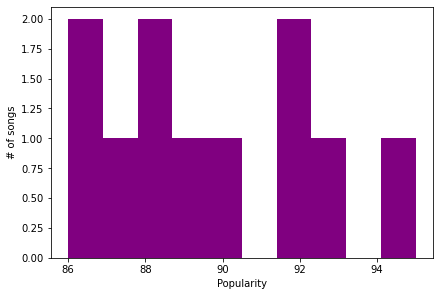

In [326]:
fig3, ax3 = plt.subplots(layout = 'constrained')
ax3.hist(Seasonal_Tracks['popularity'], color = 'Purple')
ax3.set_ylabel('# of songs')
ax3.set_xlabel('Popularity')
plt.show()

The top-rated songs were all from the winter holiday playlist; not a single song from the fall season was among the top 11 rankings. When I limited the popularity to only 85 and above, the top fall seasonal song could have been next, as its popularity was 84. This song is "Highway to Hell" by AC/DC. I stated it before in the middle of the report.